In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv("C:/Users/Francisco/Documents/Classification/gender/gender_classification.csv")
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [3]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [28]:
(df['gender'].str[0]=="M").astype(int)

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int32

In [30]:
df['Gender'] = (df['gender'].str[0]=="M").astype(int)

In [31]:
df.drop(columns="gender", inplace=True)

In [32]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


# Visualize with a bargraph

<AxesSubplot:title={'center':'Class Balance'}, xlabel='Gender', ylabel='Relative Frequency'>

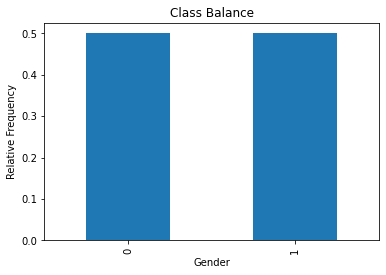

In [40]:
df['Gender'].value_counts(normalize=True).plot(kind="bar",
                                              xlabel="Gender", ylabel="Relative Frequency",
                                              title="Class Balance")

In [62]:
majority_class_prop, minority_class_prop = df['Gender'].value_counts(normalize=True)
print(majority_class_prop, minority_class_prop)

0.5000999800039992 0.4999000199960008


# Pivot Table

In [48]:
forehead_width = pd.pivot_table(df,
                               index="forehead_width_cm",
                               values="Gender",
                               aggfunc=np.mean).sort_values(by="Gender")
forehead_width.head()

,Gender
forehead_width_cm,
11.4,0.000000
11.7,0.293233
11.5,0.350649
12.9,0.354610
12.3,0.362319


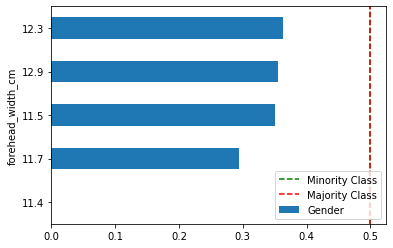

In [63]:
forehead_width.head().plot(kind="barh",legend=None)

plt.axvline(minority_class_prop,
           linestyle="--",
           color="green",
           label="Minority Class")
plt.axvline(majority_class_prop,
           linestyle="--",
           color="red",
           label="Majority Class")
plt.legend(loc="lower right")

In [65]:
df.select_dtypes("number").nunique()

long_hair                     2
forehead_width_cm            42
forehead_height_cm           21
nose_wide                     2
nose_long                     2
lips_thin                     2
distance_nose_to_lip_long     2
Gender                        2
dtype: int64

In [71]:
target = "Gender"
X = df.drop(columns=target)
y = df[target]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (4000, 7)
y_train.shape: (4000,)
X_test.shape: (1001, 7)
y_test.shape: (1001,)


# Model Fiting(Logistic Regression)

In [84]:
#Baseline model
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", acc_baseline)

Baseline Accuracy: 0.50025


In [80]:
#Build model
model=LogisticRegression(max_iter=1000)
#fit model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Evaluate Model

In [89]:
y_preds = model.predict(X_train)

In [91]:
acc_train = accuracy_score(y_train, y_preds)
acc_test = model.score(X_test, y_test)
print("Training Accuracy:", acc_train)
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.97
Test Accuracy: 0.96


In [93]:
y_train_pred_proba = model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[3.44441871e-03 9.96555581e-01]
 [9.99801484e-01 1.98515633e-04]
 [9.99691935e-01 3.08064580e-04]
 [9.99743607e-01 2.56393440e-04]
 [2.67213395e-04 9.99732787e-01]]


# Extract Features

In [100]:
features = X_train.columns
importances = model.coef_[0]


In [102]:
feat_imp = pd.Series(importances, index=features)
feat_imp.head()

long_hair            -0.347955
forehead_width_cm     0.707398
forehead_height_cm    0.977957
nose_wide             3.749823
nose_long             3.512483
dtype: float64

# Visualize Feature Importance

Text(0.5, 0, 'Odds Ratio')

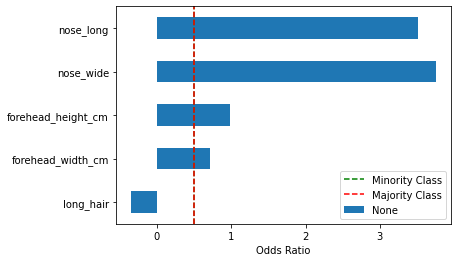

In [116]:
feat_imp.head().plot(kind="barh")
plt.axvline(minority_class_prop,
           linestyle="--",
           color="green",
           label="Minority Class")
plt.axvline(majority_class_prop,
           linestyle="--",
           color="red",
           label="Majority Class")
plt.legend(loc="lower right")
plt.xlabel("Odds Ratio")
# plt.title("Gender classification")